In [1]:
from statsforecast.arima import AutoARIMA
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import math
%matplotlib inline

/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
#sunspots
csv = "/home/mkowales/datasets/sunspots/from-article/monthly-sunspots.csv"
target = "Sunspots"
data = pd.read_csv(csv)
print(data)

        Month  Sunspots
0     1749-01      58.0
1     1749-02      62.6
2     1749-03      70.0
3     1749-04      55.7
4     1749-05      85.0
...       ...       ...
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4

[2820 rows x 2 columns]


In [23]:
#covid wastewater
csv = "/home/mkowales/datasets/covid-data/wastewater_by_region.csv"
target = "effective_concentration_rolling_average"
data = pd.read_csv(csv)
data = data.loc[data['region'] == 'Nationwide']
print(data)

    sampling_week  effective_concentration_rolling_average  \
1      2020-01-01                               107.873571   
2      2020-01-15                                22.473661   
4      2020-01-22                                 0.000000   
6      2020-01-29                                 0.000000   
8      2020-02-05                                 0.000000   
..            ...                                      ...   
730    2022-12-07                               914.918849   
735    2022-12-14                               947.085479   
740    2022-12-21                              1022.744989   
745    2022-12-28                              1093.586954   
750    2023-01-04                              1078.883677   

                 population      region  
1           100,000-300,000  Nationwide  
2       1,000,000-3,000,000  Nationwide  
4       1,000,000-3,000,000  Nationwide  
6       1,000,000-3,000,000  Nationwide  
8       1,000,000-3,000,000  Nationwide  
.. 

In [4]:
#temperatures
csv = "/home/mkowales/datasets/daily-min-temps/daily-min-temperatures.csv"
target = "Temp"
data = pd.read_csv(csv)
print(data)

            Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]


In [33]:
#sine wave
n = 1000
d = {'index' : list(range(n)),
    'target' : [math.sin(i/100) for i in range(1000)]}
target = 'target'
data = pd.DataFrame(data = d)
print(data)

     index    target
0        0  0.000000
1        1  0.010000
2        2  0.019999
3        3  0.029996
4        4  0.039989
..     ...       ...
995    995 -0.501405
996    996 -0.510032
997    997 -0.518608
998    998 -0.527132
999    999 -0.535603

[1000 rows x 2 columns]


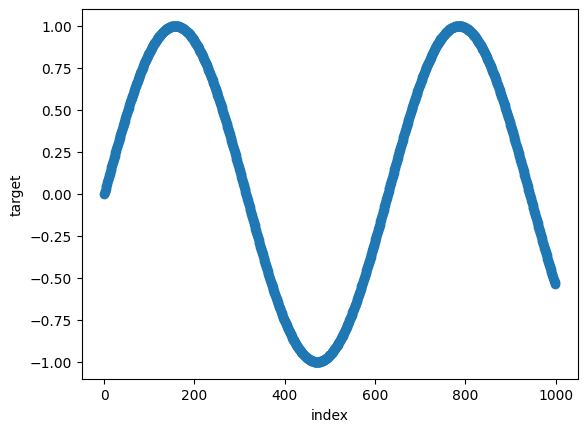

In [34]:
plt.scatter(data.index, data[target])
plt.xlabel("index")
plt.ylabel(target)
plt.show()

In [35]:
nrows = data.shape[0]
split = 0.8
splitrow = round(nrows * split)
print(splitrow)

800


In [36]:
train = data.iloc[0:splitrow, ]
test = data.iloc[splitrow:nrows, ]
testnrows = test.shape[0]
trainnpy = train[target].to_numpy()
testnpy = test[target].to_numpy()
print(train)
print(test)

     index    target
0        0  0.000000
1        1  0.010000
2        2  0.019999
3        3  0.029996
4        4  0.039989
..     ...       ...
795    795  0.995394
796    796  0.994385
797    797  0.993277
798    798  0.992070
799    799  0.990764

[800 rows x 2 columns]
     index    target
800    800  0.989358
801    801  0.987854
802    802  0.986251
803    803  0.984549
804    804  0.982748
..     ...       ...
995    995 -0.501405
996    996 -0.510032
997    997 -0.518608
998    998 -0.527132
999    999 -0.535603

[200 rows x 2 columns]


In [37]:
pmdModel = auto_arima(
    trainnpy
)
pmdModel.fit(trainnpy)
pmdTest = pmdModel.predict(n_periods=testnrows)
#print(pmdTest)

/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [38]:
sfModel = AutoARIMA()
sfModel.fit(trainnpy)
sfTest = sfModel.predict(h=testnrows)
sfTest = sfTest['mean'].to_numpy()
#print(sfTest)

/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/mkowales/anaconda3/envs/autonmlenv7/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarnin

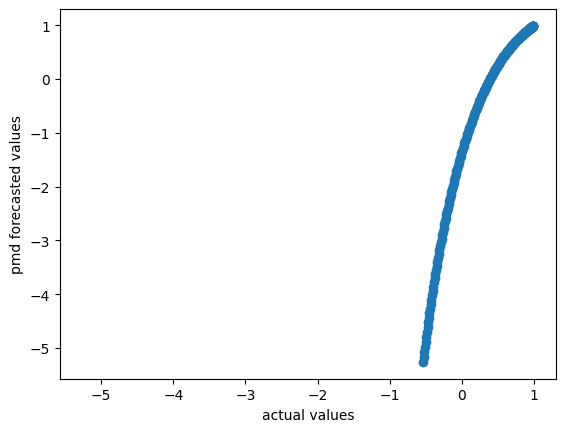

In [39]:
plt.scatter(testnpy, pmdTest)
plt.xlabel("actual values")
plt.ylabel("pmd forecasted values")

minval = min(min(testnpy), min(pmdTest))
maxval = max(max(testnpy), max(pmdTest))
pad = (maxval-minval)*.05
ax = plt.gca()
ax.set_xlim(minval - pad, maxval + pad)
ax.set_ylim(minval - pad, maxval + pad)

plt.show()

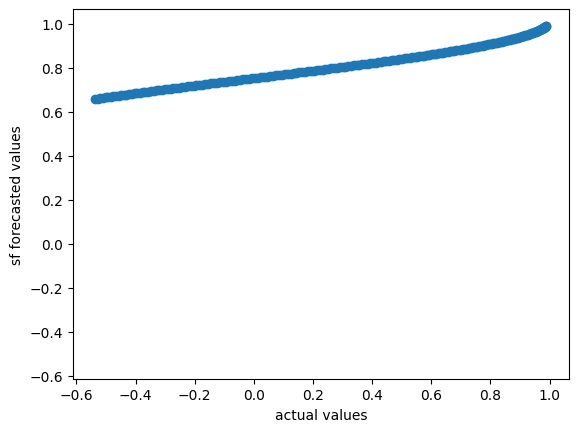

In [40]:
#plot actual vs real
plt.scatter(testnpy, sfTest)
plt.xlabel("actual values")
plt.ylabel("sf forecasted values")

minval = min(min(testnpy), min(sfTest))
maxval = max(max(testnpy), max(sfTest))
pad = (maxval-minval)*.05
ax = plt.gca()
ax.set_xlim(minval - pad, maxval + pad)
ax.set_ylim(minval - pad, maxval + pad)

plt.show()

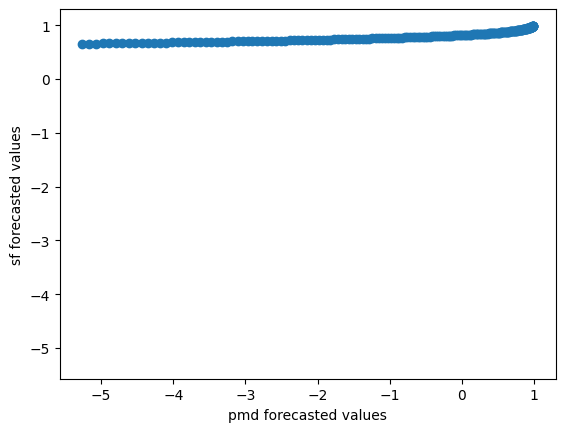

In [41]:
#plot sf vs pmd
plt.scatter(pmdTest, sfTest)
plt.xlabel("pmd forecasted values")
plt.ylabel("sf forecasted values")

minval = min(min(pmdTest), min(sfTest))
maxval = max(max(pmdTest), max(sfTest))

pad = (maxval-minval)*.05
ax = plt.gca()
ax.set_xlim(minval - pad, maxval + pad)
ax.set_ylim(minval - pad, maxval + pad)

plt.show()

In [42]:
#calculate r squared
pmdr2 = r2_score(testnpy, pmdTest)
sfr2 = r2_score(testnpy, sfTest)
print(pmdr2)
print(sfr2)

-10.72796126602869
-0.6210472890267491
